### Linear Regression Task
- 각 광고 종목에 투자했을 때, 수익이 얼만큼 발생하는지 회귀 예측 진행

In [247]:
import pandas as pd 

path = '../datasets/advertising.csv'
ad_origin_df = pd.read_csv(path)
ad_df = ad_origin_df.copy()
ad_df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [248]:
columns = ['TV', 'Radio', 'Newspaper', 'Sales']
ad_df = ad_df[columns]
ad_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [249]:
ad_df.corr()['Sales'].sort_values(ascending=False)[1:]

TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

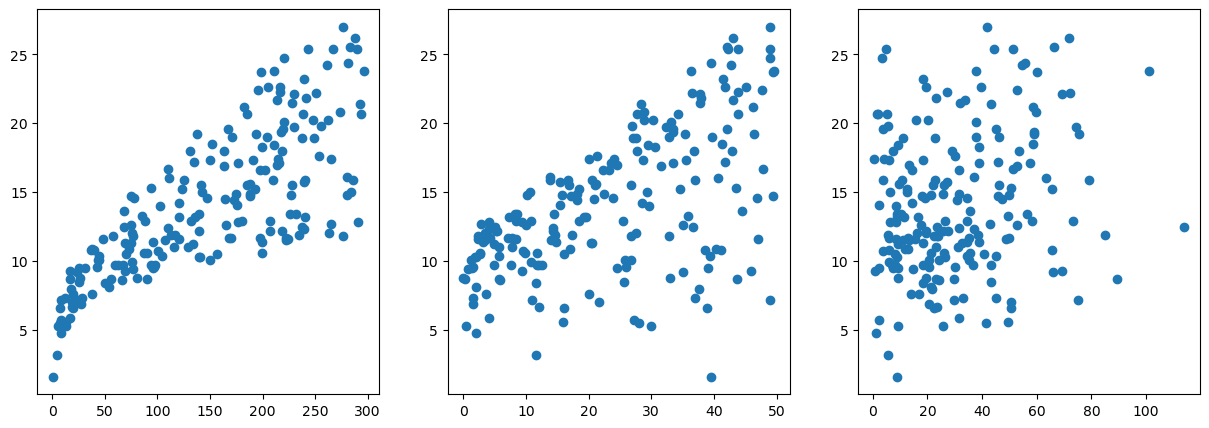

In [250]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(ad_df['TV'], ad_df['Sales'])
axes[1].scatter(ad_df['Radio'], ad_df['Sales'])
axes[2].scatter(ad_df['Newspaper'], ad_df['Sales'])
plt.show()

In [251]:
# TV 선택
ad_df = ad_df[['TV', 'Sales']]
ad_df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

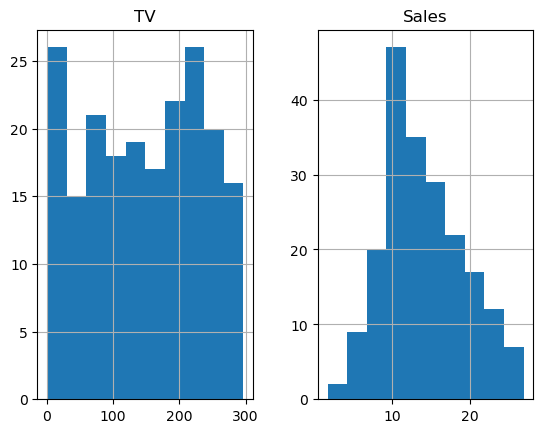

In [19]:
ad_df.hist()

In [203]:
# 전처리 없이 확인
from sklearn.model_selection import train_test_split
import torch
from torch.nn.functional import mse_loss
from torch.optim import SGD

torch.manual_seed(321)

features, targets = ad_df.iloc[:, :-1], ad_df.iloc[:, -1]

# display(features.values)
# display(targets.values.view(-1,1))

tv_X_train, tv_X_test, tv_y_train, tv_y_test = \
train_test_split(features, targets, test_size=0.2, random_state=321)

tv_X_train = torch.FloatTensor(tv_X_train.values)
tv_y_train = torch.FloatTensor(tv_y_train.values).view(-1,1)

tv_X_test = torch.FloatTensor(tv_X_test.values)
tv_y_test = torch.FloatTensor(tv_y_test.values).view(-1,1)


W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# 경사하강법
optimizer = SGD([W, b], lr=1e-5)

epochs = 10000

for epoch in range(1, epochs +1):
    H = W* X_train + b
    loss = torch.mean((y_train - H) ** 2)
    # 옵티마이저 초기화
    optimizer.zero_grad()
    # 손실함수 미분
    loss.backward()
    # 옵티마이저 대입
    optimizer.step()

    if epoch % 100 == 0:
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}'.format(epoch, epochs, W.item(),b.item(), loss.item()))




 100/10000: W: 0.0832, b: 0.0038, loss: 22.7785
 200/10000: W: 0.0831, b: 0.0073, loss: 22.7668
 300/10000: W: 0.0831, b: 0.0107, loss: 22.7551
 400/10000: W: 0.0831, b: 0.0141, loss: 22.7435
 500/10000: W: 0.0831, b: 0.0175, loss: 22.7318
 600/10000: W: 0.0831, b: 0.0209, loss: 22.7202
 700/10000: W: 0.0831, b: 0.0243, loss: 22.7085
 800/10000: W: 0.0830, b: 0.0277, loss: 22.6969
 900/10000: W: 0.0830, b: 0.0311, loss: 22.6853
1000/10000: W: 0.0830, b: 0.0346, loss: 22.6737
1100/10000: W: 0.0830, b: 0.0380, loss: 22.6621
1200/10000: W: 0.0830, b: 0.0414, loss: 22.6505
1300/10000: W: 0.0830, b: 0.0448, loss: 22.6389
1400/10000: W: 0.0829, b: 0.0482, loss: 22.6274
1500/10000: W: 0.0829, b: 0.0516, loss: 22.6158
1600/10000: W: 0.0829, b: 0.0550, loss: 22.6043
1700/10000: W: 0.0829, b: 0.0584, loss: 22.5928
1800/10000: W: 0.0829, b: 0.0617, loss: 22.5813
1900/10000: W: 0.0828, b: 0.0651, loss: 22.5698
2000/10000: W: 0.0828, b: 0.0685, loss: 22.5583
2100/10000: W: 0.0828, b: 0.0719, loss: 

In [ ]:
H = 0.0815 * tv_X_test + 0.3344
loss = torch.mean((H - tv_y_test) ** 2)
print(loss)a

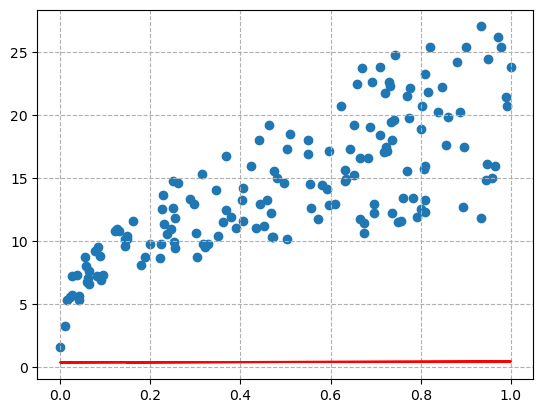

In [205]:
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

#  21.6746
plt.scatter(tv_X_train, tv_y_train)
plt.plot(tv_X_train, 0.0815 * tv_X_train + 0.3344, color="red")
plt.grid(visible=True, linestyle='--')
plt.show()

In [206]:
from torch.nn import Linear

torch.manual_seed(321)
l_r = Linear(1, 1)

optimizer = SGD(l_r.parameters(), lr= 1e-5)

epochs = 5000

for epoch in range(1, epochs + 1):
    H = l_r(X_train)
    loss = mse_loss(H, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        W = list(l_r.parameters())[0].item()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W, b, loss.item()))

 100/5000: W: 0.0859, b: -0.5450, loss: 24.7299
 200/5000: W: 0.0859, b: -0.5413, loss: 24.7163
 300/5000: W: 0.0859, b: -0.5376, loss: 24.7026
 400/5000: W: 0.0858, b: -0.5339, loss: 24.6891
 500/5000: W: 0.0858, b: -0.5302, loss: 24.6755
 600/5000: W: 0.0858, b: -0.5266, loss: 24.6619
 700/5000: W: 0.0858, b: -0.5229, loss: 24.6484
 800/5000: W: 0.0858, b: -0.5192, loss: 24.6349
 900/5000: W: 0.0858, b: -0.5155, loss: 24.6214
1000/5000: W: 0.0857, b: -0.5118, loss: 24.6079
1100/5000: W: 0.0857, b: -0.5082, loss: 24.5944
1200/5000: W: 0.0857, b: -0.5045, loss: 24.5809
1300/5000: W: 0.0857, b: -0.5008, loss: 24.5674
1400/5000: W: 0.0857, b: -0.4972, loss: 24.5540
1500/5000: W: 0.0856, b: -0.4935, loss: 24.5405
1600/5000: W: 0.0856, b: -0.4898, loss: 24.5271
1700/5000: W: 0.0856, b: -0.4862, loss: 24.5137
1800/5000: W: 0.0856, b: -0.4825, loss: 24.5003
1900/5000: W: 0.0856, b: -0.4789, loss: 24.4869
2000/5000: W: 0.0856, b: -0.4752, loss: 24.4735
2100/5000: W: 0.0855, b: -0.4715, loss: 

In [ ]:
H = 0.0850 * tv_X_test - 0.3663
loss = torch.mean((H - tv_y_test) ** 2)
print(loss)a

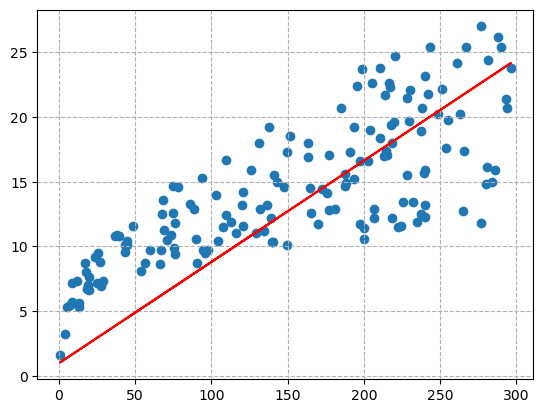

In [109]:
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

plt.scatter(X_train, y_train)
plt.plot(X_train, 0.0783 * X_train + 0.9667, color="red")
plt.grid(visible=True, linestyle='--')
plt.show()

In [79]:
from torch.nn import Module, Linear

class LinearRegressionModel(Module):
    def __init__(self):
        super().__init__()
        self.linear = Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [210]:
torch.manual_seed(321)

l_r = LinearRegressionModel()
optimizer = SGD(l_r.parameters(), lr=1e-3)
epochs = 200000

for epoch in range(1, epochs +1):
    H = l_r(tv_X_train)

    loss = mse_loss(H, tv_y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        W = list(l_r.parameters())[0].item()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W, b, loss.item()))


 100/200000: W: 2.1222, b: 2.0104, loss: 148.9012
 200/200000: W: 3.3176, b: 3.9790, loss: 95.3638
 300/200000: W: 4.2638, b: 5.4925, loss: 63.2076
 400/200000: W: 5.0167, b: 6.6538, loss: 43.8770
 500/200000: W: 5.6197, b: 7.5423, loss: 32.2402
 600/200000: W: 6.1063, b: 8.2197, loss: 25.2192
 700/200000: W: 6.5025, b: 8.7339, loss: 20.9678
 800/200000: W: 6.8284, b: 9.1217, loss: 18.3787
 900/200000: W: 7.0997, b: 9.4118, loss: 16.7875
1000/200000: W: 7.3284, b: 9.6263, loss: 15.7960
1100/200000: W: 7.5238, b: 9.7825, loss: 15.1652
1200/200000: W: 7.6933, b: 9.8936, loss: 14.7516
1300/200000: W: 7.8424, b: 9.9700, loss: 14.4692
1400/200000: W: 7.9755, b: 10.0195, loss: 14.2664
1500/200000: W: 8.0960, b: 10.0484, loss: 14.1122
1600/200000: W: 8.2064, b: 10.0614, loss: 13.9880
1700/200000: W: 8.3089, b: 10.0623, loss: 13.8827
1800/200000: W: 8.4050, b: 10.0539, loss: 13.7895
1900/200000: W: 8.4960, b: 10.0384, loss: 13.7043
2000/200000: W: 8.5827, b: 10.0176, loss: 13.6247
2100/200000:

KeyboardInterrupt: 

In [ ]:
H = 14.2799 * tv_X_test + 7.0087
loss = torch.mean((H - tv_y_test) ** 2)
print(loss)a

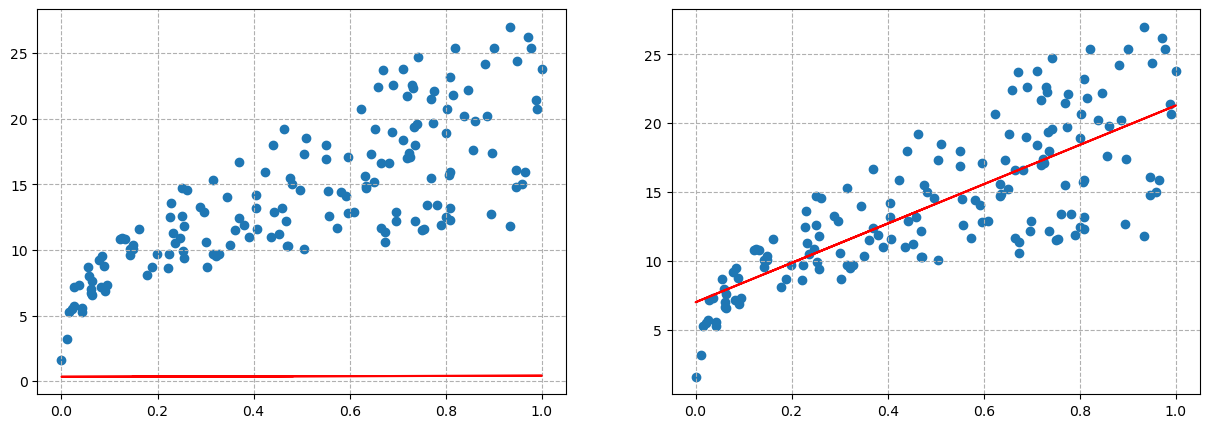

In [211]:
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False


fig, axes =  plt.subplots(1, 2, figsize=(15, 5))


# loss: 19.xxxx
axes[0].scatter(tv_X_train, tv_y_train)
axes[0].plot(tv_X_train, 0.0815 * tv_X_train + 0.3344, color="red")
axes[0].grid(visible=True, linestyle='--') 

# loss: 10.8592
axes[1].scatter(tv_X_train, tv_y_train)
axes[1].plot(tv_X_train, 14.2769 * tv_X_train + 7.0104, color="red")
axes[1].grid(visible=True, linestyle='--')
plt.show()


In [ ]:
# 다른 feature 확인

In [219]:
# 전처리 없이 확인
from sklearn.model_selection import train_test_split
import torch
from torch.nn.functional import mse_loss
from torch.optim import SGD

torch.manual_seed(321)

features, targets = ad_r_df.iloc[:, :-1], ad_r_df.iloc[:, -1]

# display(features.values)
# display(targets.values.view(-1,1))

ra_X_train, ra_X_test, ra_y_train, ra_y_test = \
train_test_split(features, targets, test_size=0.2, random_state=321)

ra_X_train = torch.FloatTensor(ra_X_train.values)
ra_y_train = torch.FloatTensor(ra_y_train.values).view(-1,1)

ra_X_test = torch.FloatTensor(ra_X_test.values)
ra_y_test = torch.FloatTensor(ra_y_test.values).view(-1,1)


W = torch.zeros(1, requires_grad=True)

b = torch.zeros(1, requires_grad=True)

optimizer = SGD([W, b], lr=1e-5)

epochs = 10000

for epoch in range(1, epochs +1):
    H = W* X_train + b
    loss = torch.mean((y_train - H) ** 2)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}'.format(epoch, epochs, W.item(),b.item(), loss.item()))




 100/10000: W: 0.0155, b: 0.0285, loss: 230.4775
 200/10000: W: 0.0310, b: 0.0569, loss: 229.4312
 300/10000: W: 0.0464, b: 0.0852, loss: 228.3900
 400/10000: W: 0.0618, b: 0.1135, loss: 227.3540
 500/10000: W: 0.0771, b: 0.1417, loss: 226.3232
 600/10000: W: 0.0924, b: 0.1698, loss: 225.2975
 700/10000: W: 0.1077, b: 0.1979, loss: 224.2769
 800/10000: W: 0.1229, b: 0.2259, loss: 223.2614
 900/10000: W: 0.1381, b: 0.2538, loss: 222.2510
1000/10000: W: 0.1533, b: 0.2817, loss: 221.2456
1100/10000: W: 0.1684, b: 0.3094, loss: 220.2452
1200/10000: W: 0.1835, b: 0.3371, loss: 219.2498
1300/10000: W: 0.1985, b: 0.3648, loss: 218.2593
1400/10000: W: 0.2136, b: 0.3923, loss: 217.2738
1500/10000: W: 0.2285, b: 0.4198, loss: 216.2933
1600/10000: W: 0.2435, b: 0.4473, loss: 215.3176
1700/10000: W: 0.2584, b: 0.4746, loss: 214.3467
1800/10000: W: 0.2733, b: 0.5019, loss: 213.3807
1900/10000: W: 0.2881, b: 0.5291, loss: 212.4195
2000/10000: W: 0.3029, b: 0.5563, loss: 211.4631
2100/10000: W: 0.317

In [220]:
torch.manual_seed(321)

l_r = LinearRegressionModel()
optimizer = SGD(l_r.parameters(), lr=1e-3)
epochs = 200000

for epoch in range(1, epochs +1):
    H = l_r(ra_X_train)

    loss = mse_loss(H, ra_y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        W = list(l_r.parameters())[0].item()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W, b, loss.item()))


 100/200000: W: 1.9967, b: 2.0230, loss: 152.7658
 200/200000: W: 3.0897, b: 4.0184, loss: 100.5390
 300/200000: W: 3.9502, b: 5.5671, loss: 68.8654
 400/200000: W: 4.6297, b: 6.7681, loss: 49.6529
 500/200000: W: 5.1680, b: 7.6985, loss: 37.9956
 600/200000: W: 5.5963, b: 8.4182, loss: 30.9190
 700/200000: W: 5.9388, b: 8.9739, loss: 26.6200
 800/200000: W: 6.2143, b: 9.4020, loss: 24.0050
 900/200000: W: 6.4376, b: 9.7308, loss: 22.4114
1000/200000: W: 6.6201, b: 9.9823, loss: 21.4372
1100/200000: W: 6.7707, b: 10.1738, loss: 20.8387
1200/200000: W: 6.8963, b: 10.3185, loss: 20.4683
1300/200000: W: 7.0024, b: 10.4269, loss: 20.2364
1400/200000: W: 7.0931, b: 10.5071, loss: 20.0886
1500/200000: W: 7.1718, b: 10.5654, loss: 19.9921
1600/200000: W: 7.2409, b: 10.6067, loss: 19.9268
1700/200000: W: 7.3026, b: 10.6348, loss: 19.8806
1800/200000: W: 7.3583, b: 10.6527, loss: 19.8462
1900/200000: W: 7.4092, b: 10.6627, loss: 19.8192
2000/200000: W: 7.4563, b: 10.6666, loss: 19.7968
2100/200


KeyboardInterrupt



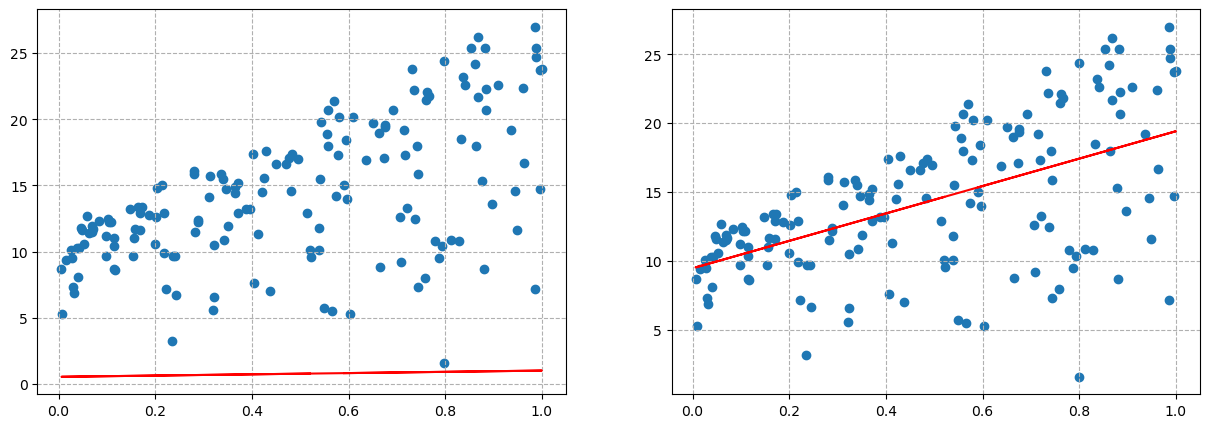

In [221]:
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False


fig, axes =  plt.subplots(1, 2, figsize=(15, 5))


# loss: 41.6187
axes[0].scatter(ra_X_train, ra_y_train)
axes[0].plot(ra_X_train, 0.4706 * ra_X_train + 0.5288, color="red")
axes[0].grid(visible=True, linestyle='--') 

# loss: 19.2383
axes[1].scatter(ra_X_train, ra_y_train)
axes[1].plot(ra_X_train, 9.9443 * ra_X_train + 9.4764, color="red")
axes[1].grid(visible=True, linestyle='--')
plt.show()


In [173]:
# 다른항목 비교
ad_origin_df
columns = ['Newspaper','Sales']
ad_n_df = ad_origin_df[columns]
ad_n_df

,Newspaper,Sales
0,69.2,22.1
1,45.1,10.4
2,69.3,9.3
3,58.5,18.5
4,58.4,12.9
...,...,...
195,13.8,7.6
196,8.1,9.7
197,6.4,12.8
198,66.2,25.5


In [223]:
# 전처리 없이 확인
from sklearn.model_selection import train_test_split
import torch
from torch.nn.functional import mse_loss
from torch.optim import SGD

torch.manual_seed(321)

features, targets = ad_n_df.iloc[:, :-1], ad_n_df.iloc[:, -1]

# display(features.values)
# display(targets.values.view(-1,1))

nw_X_train, nw_X_test, nw_y_train, nw_y_test = \
train_test_split(features, targets, test_size=0.2, random_state=321)

nw_X_train = torch.FloatTensor(nw_X_train.values)
nw_y_train = torch.FloatTensor(nw_y_train.values).view(-1,1)

nw_X_test = torch.FloatTensor(nw_X_test.values)
nw_y_test = torch.FloatTensor(nw_y_test.values).view(-1,1)


W = torch.zeros(1, requires_grad=True)

b = torch.zeros(1, requires_grad=True)

optimizer = SGD([W, b], lr=1e-5)

epochs = 10000

for epoch in range(1, epochs +1):
    H = W* X_train + b
    loss = torch.mean((y_train - H) ** 2)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}'.format(epoch, epochs, W.item(),b.item(), loss.item()))




 100/10000: W: 0.0155, b: 0.0285, loss: 230.4775
 200/10000: W: 0.0310, b: 0.0569, loss: 229.4312
 300/10000: W: 0.0464, b: 0.0852, loss: 228.3900
 400/10000: W: 0.0618, b: 0.1135, loss: 227.3540
 500/10000: W: 0.0771, b: 0.1417, loss: 226.3232
 600/10000: W: 0.0924, b: 0.1698, loss: 225.2975
 700/10000: W: 0.1077, b: 0.1979, loss: 224.2769
 800/10000: W: 0.1229, b: 0.2259, loss: 223.2614
 900/10000: W: 0.1381, b: 0.2538, loss: 222.2510
1000/10000: W: 0.1533, b: 0.2817, loss: 221.2456
1100/10000: W: 0.1684, b: 0.3094, loss: 220.2452
1200/10000: W: 0.1835, b: 0.3371, loss: 219.2498
1300/10000: W: 0.1985, b: 0.3648, loss: 218.2593
1400/10000: W: 0.2136, b: 0.3923, loss: 217.2738
1500/10000: W: 0.2285, b: 0.4198, loss: 216.2933
1600/10000: W: 0.2435, b: 0.4473, loss: 215.3176
1700/10000: W: 0.2584, b: 0.4746, loss: 214.3467
1800/10000: W: 0.2733, b: 0.5019, loss: 213.3807
1900/10000: W: 0.2881, b: 0.5291, loss: 212.4195
2000/10000: W: 0.3029, b: 0.5563, loss: 211.4631
2100/10000: W: 0.317

In [229]:
torch.manual_seed(321)

l_r = LinearRegressionModel()
optimizer = SGD(l_r.parameters(), lr=1e-4)
epochs = 100000

for epoch in range(1, epochs +1):
    H = l_r(nw_X_train)

    loss = mse_loss(H, nw_y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        W = list(l_r.parameters())[0].item()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W, b, loss.item()))


 100/100000: W: 0.6877, b: -0.2563, loss: 233.3263
 200/100000: W: 0.7684, b: 0.0272, loss: 224.6318
 300/100000: W: 0.8473, b: 0.3048, loss: 216.3040
 400/100000: W: 0.9246, b: 0.5764, loss: 208.3273
 500/100000: W: 1.0002, b: 0.8422, loss: 200.6870
 600/100000: W: 1.0742, b: 1.1023, loss: 193.3690
 700/100000: W: 1.1467, b: 1.3569, loss: 186.3594
 800/100000: W: 1.2176, b: 1.6061, loss: 179.6455
 900/100000: W: 1.2870, b: 1.8499, loss: 173.2147
1000/100000: W: 1.3550, b: 2.0886, loss: 167.0551
1100/100000: W: 1.4215, b: 2.3222, loss: 161.1552
1200/100000: W: 1.4866, b: 2.5507, loss: 155.5042
1300/100000: W: 1.5503, b: 2.7745, loss: 150.0914
1400/100000: W: 1.6127, b: 2.9934, loss: 144.9069
1500/100000: W: 1.6738, b: 3.2077, loss: 139.9410
1600/100000: W: 1.7335, b: 3.4174, loss: 135.1845
1700/100000: W: 1.7920, b: 3.6226, loss: 130.6286
1800/100000: W: 1.8493, b: 3.8235, loss: 126.2648
1900/100000: W: 1.9054, b: 4.0200, loss: 122.0850
2000/100000: W: 1.9603, b: 4.2124, loss: 118.0815

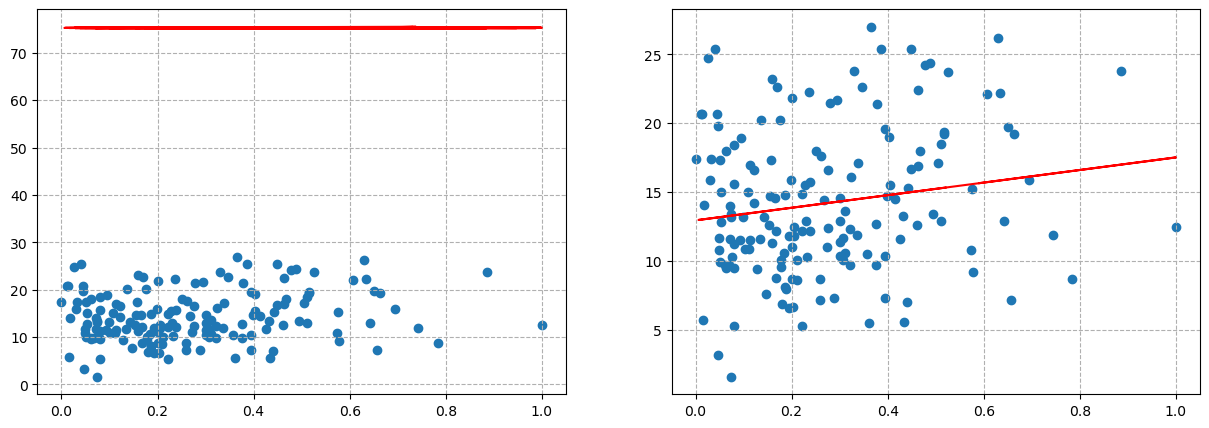

In [225]:
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False


fig, axes =  plt.subplots(1, 2, figsize=(15, 5))


# loss: 41.6187
axes[0].scatter(nw_X_train, nw_y_train)
axes[0].plot(X_train, 0.2136 * nw_X_train + 75.2175, color="red")
axes[0].grid(visible=True, linestyle='--') 

# loss: 27.1286
axes[1].scatter(nw_X_train, nw_y_train)
axes[1].plot(X_train, 4.5674 * X_train + 12.9531, color="red")
axes[1].grid(visible=True, linestyle='--')
plt.show()


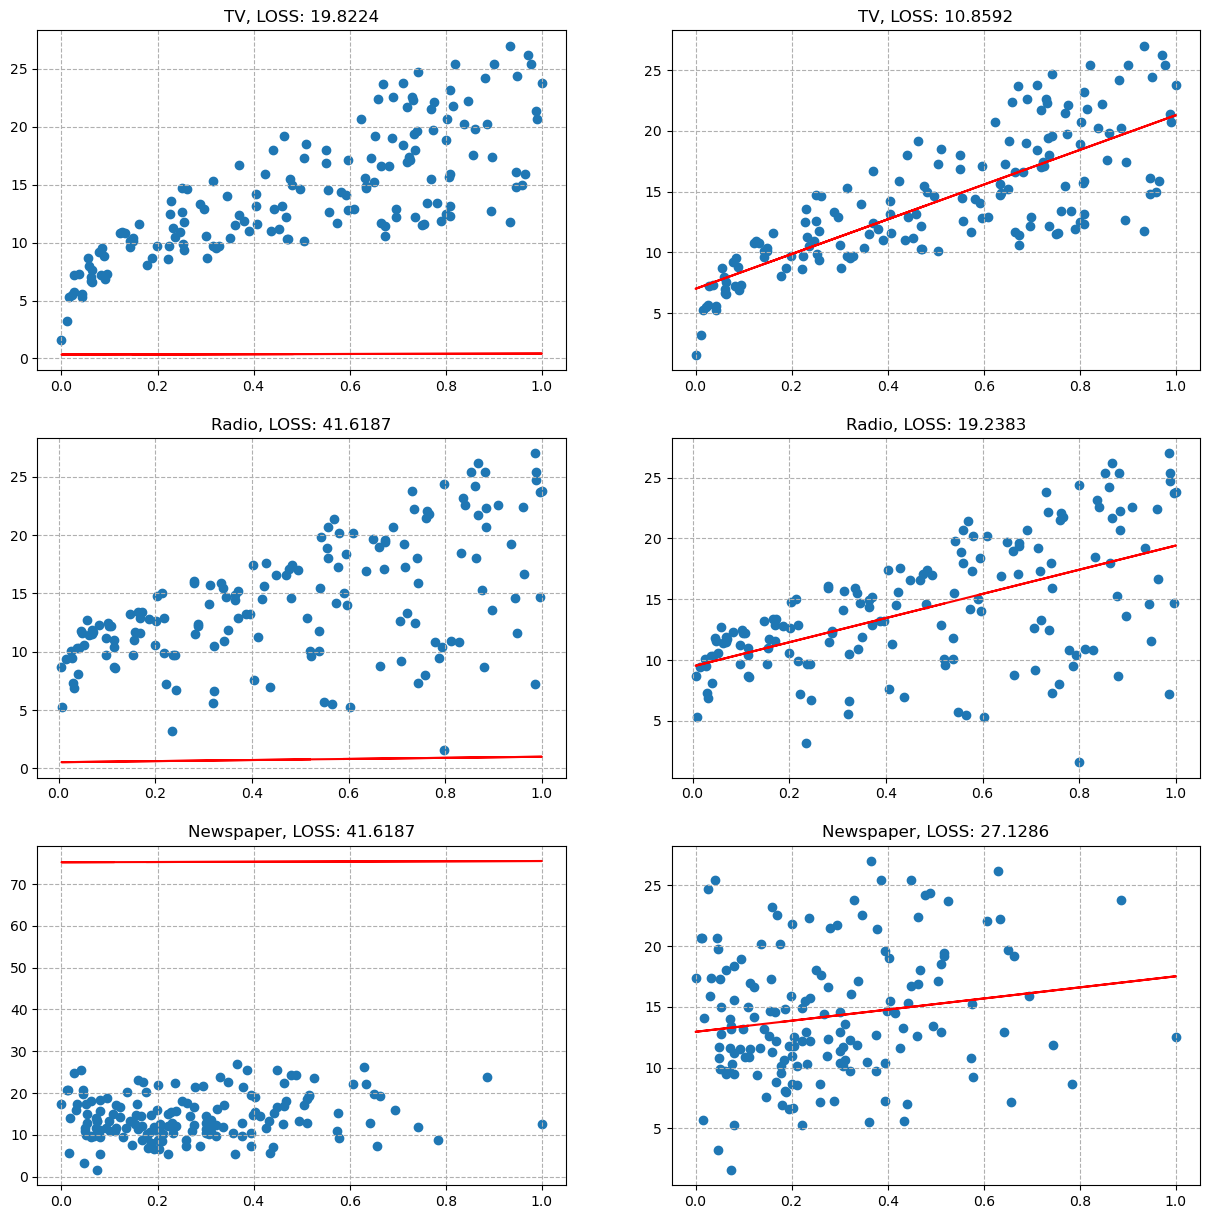

In [227]:
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False


fig, axes =  plt.subplots(3, 2, figsize=(15, 15))


# loss: 19.xxxx
axes[0,0].scatter(tv_X_train, tv_y_train)
axes[0,0].plot(tv_X_train, 0.0815 * tv_X_train + 0.3344, color="red")
axes[0,0].grid(visible=True, linestyle='--') 
axes[0, 0].set_title('TV, LOSS: 19.8224')

# loss: 10.8592
axes[0,1].scatter(tv_X_train, tv_y_train)
axes[0,1].plot(tv_X_train, 14.2769 * tv_X_train + 7.0104, color="red")
axes[0,1].grid(visible=True, linestyle='--')
axes[0,1].set_title('TV, LOSS: 10.8592')

# loss: 41.6187
axes[1,0].scatter(ra_X_train, ra_y_train)
axes[1,0].plot(X_train, 0.4706 * ra_X_train + 0.5288, color="red")
axes[1,0].grid(visible=True, linestyle='--') 
axes[1,0].set_title('Radio, LOSS: 41.6187')

# loss: 19.2383
axes[1,1].scatter(ra_X_train, ra_y_train)
axes[1,1].plot(ra_X_train, 9.9443 * ra_X_train + 9.4764, color="red")
axes[1,1].grid(visible=True, linestyle='--')
axes[1,1].set_title('Radio, LOSS: 19.2383')


# loss: 41.6187
axes[2,0].scatter(nw_X_train, nw_y_train)
axes[2,0].plot(nw_X_train, 0.3012 * nw_X_train + 75.2175, color="red")
axes[2,0].grid(visible=True, linestyle='--') 
axes[2,0].set_title('Newspaper, LOSS: 41.6187')

# loss: 27.1286
axes[2,1].scatter(nw_X_train, nw_y_train)
axes[2,1].plot(nw_X_train, 4.5674 * nw_X_train + 12.9531, color="red")
axes[2,1].grid(visible=True, linestyle='--')
axes[2,1].set_title('Newspaper, LOSS: 27.1286')
plt.show()


### Sklearn - LinearRegression

In [263]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features, targets = ad_df.iloc[:, :-1], ad_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
print('W: {:.4f}, b: {:.4f}'.format(l_r.coef_[0], l_r.intercept_))

LinearRegression()

In [264]:
prediction = l_r.predict(X_test)
print('MSE loss: {:.4f}, RMSE loss: {:.4f}'\
      .format(mean_squared_error(y_test, prediction), np.sqrt(mean_squared_error(y_test, prediction))))

MSE loss: 9.1646, RMSE loss: 3.0273


In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.scatter(ad_df.TV, pre_a_df.Sales)
plt.plot(ad_df.TV, 0.0767 * ad_df.TV + 1.2851, color="red")
plt.plot(ad_df.TV, 0.0467 * ad_df.TV + 7.2020, color="pink")
plt.grid(visible=True, linestyle='--')
plt.show()